# Working with structured data in Python using Pandas

# Ionita Ionit-Ovidiu 342A3

In [2]:
import numpy as np
import requests
from bs4 import BeautifulSoup as beautifulSoup

URL de unde se iau datele.

In [3]:
URL='https://www.worldometers.info/coronavirus/' 

Se face un get request pe acel URL.

In [4]:
page = requests.get(URL) 

Parsarea paginii in pentru a accesa continutul acesteia.

In [5]:
parser = beautifulSoup(page.content, 'html.parser')

Cautarea tabelei care contine date referitoare la numarul total de cazuri.

In [6]:
table=parser.find("table")

Parcuregerea tabelei de unde o sa extragem datele despre tari.

In [7]:
output_rows = []
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)

Afisarea datelor din tabela.

In [8]:
output_rows


[[],
 ['\nNorth America\n',
  '1,499,119',
  '+2,354',
  '90,109',
  '+122',
  '322,243',
  '1,086,767',
  '17,683',
  '',
  '',
  '',
  '',
  'North America'],
 ['\nEurope\n',
  '1,641,384',
  '+12,808',
  '152,927',
  '+187',
  '665,690',
  '822,767',
  '14,006',
  '',
  '',
  '',
  '',
  'Europe'],
 ['\nSouth America\n',
  '310,189',
  '+119',
  '16,388',
  '+4',
  '108,640',
  '185,161',
  '10,114',
  '',
  '',
  '',
  '',
  'South America'],
 ['\nAsia\n',
  '672,272',
  '+3,539',
  '22,240',
  '+51',
  '372,870',
  '277,162',
  '4,988',
  '',
  '',
  '',
  '',
  'Asia'],
 ['\nAfrica\n',
  '65,225',
  '+475',
  '2,301',
  '',
  '22,799',
  '40,125',
  '224',
  '',
  '',
  '',
  '',
  'Africa'],
 ['\nOceania\n',
  '8,549',
  '+10',
  '118',
  '',
  '7,649',
  '782',
  '20',
  '',
  '',
  '',
  '',
  'Australia/Oceania'],
 ['\n\n', '721', '', '15', '', '651', '55', '4', '', '', '', '', ''],
 ['World',
  '4,197,459',
  '+19,305',
  '284,098',
  '+364',
  '1,500,542',
  '2,412,819',
  

Afisarea datelor alese 

In [23]:
print(output_rows[9][0] ,output_rows[9][1])
print(output_rows[10][0] ,output_rows[10][1])
print(output_rows[11][0] ,output_rows[11][1])
print(output_rows[12][0] ,output_rows[12][1])
print(output_rows[13][0] ,output_rows[13][1])
print(output_rows[14][0] ,output_rows[14][1])
print(output_rows[15][0] ,output_rows[15][1])
print(output_rows[16][0] ,output_rows[16][1])
print(output_rows[43][0] ,output_rows[43][1])

USA 1,367,963
Spain 264,663
Russia 221,344
UK 219,183
Italy 219,070
France 176,970
Germany 171,879
Brazil 162,699
Romania 15,362


Am salvat datele sub forma de DataFrame si le-am exportat sub forma de csv and xlsx

In [14]:
import pandas as pd

data = {'Tara': [output_rows[9][0],output_rows[10][0],output_rows[11][0],output_rows[12][0],output_rows[13][0],output_rows[14][0],output_rows[15][0],output_rows[16][0],output_rows[43][0]],
        'Cazuri noi': [output_rows[9][1],output_rows[10][1],output_rows[11][1],output_rows[12][1],output_rows[13][1],output_rows[14][1],output_rows[15][1],output_rows[16][1],output_rows[43][1]]}

df = pd.DataFrame(data, columns= ['Tara', 'Cazuri noi'])

print (df)


from IPython.display import FileLink, FileLinks

df.to_csv("data.csv", index=False)
df.to_excel("data.xlsx", index=False)

      Tara Cazuri noi
0      USA  1,367,963
1    Spain    264,663
2   Russia    221,344
3       UK    219,183
4    Italy    219,070
5   France    176,970
6  Germany    171,879
7   Brazil    162,699
8   Turkey    138,657


print (output_rows[9][1].replace(',', '')) - Am identificat o problema legata de tipul variabilelor, acestea erau delimitate prin  iar parsarea din String in Int nu se putea realiza
Am creat un grafic in care putem vedea diferentele intre numarul de cazuri total al tarilor.

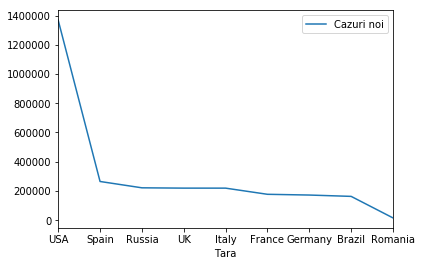

In [25]:
from pandas import DataFrame
import matplotlib.pyplot as plt
data = {'Tara': [output_rows[9][0],output_rows[10][0],output_rows[11][0],output_rows[12][0],output_rows[13][0],output_rows[14][0],output_rows[15][0],output_rows[16][0],output_rows[43][0]],
        'Cazuri noi': [output_rows[9][1].replace(',', ''),output_rows[10][1].replace(',', ''),output_rows[11][1].replace(',', ''),output_rows[12][1].replace(',', '')
                       ,output_rows[13][1].replace(',', ''),output_rows[14][1].replace(',', ''),output_rows[15][1].replace(',', ''),output_rows[16][1].replace(',', '')
                       ,output_rows[43][1].replace(',', '')]}
df = DataFrame(data,columns=['Tara','Cazuri noi'])

df['Cazuri noi'] = pd.to_numeric(df['Cazuri noi'])

df.plot(x ='Tara', y='Cazuri noi', kind = 'line')
plt.show()